# Here, we predict loan status of an applicant using historical dataset from previous loan applications.

We shall be using the following algorithms to build the models:- <br>

1. k-Nearest Neighbour <br>

2. Decision Tree <br>

3. Logistic Regression <br>

4. Support Vector Machine <br>


## Let's first import the required libraries!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

## About the dataset ##

The Loan_train.csv data set includes details of 346 customers.
Lets download the dataset!

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-05-20 05:28:08--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.07s   

2020-05-20 05:28:09 (303 KB/s) - ‘loan_train.csv’ saved [23101/23101]



In [3]:
df = pd.read_csv('loan_train.csv')
df.head()


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
#length of the dataframe
len(df)

346

# Analyzing Data

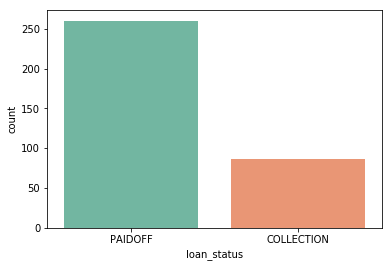

In [5]:
sns.countplot(x="loan_status",palette="Set2", data=df)

In [6]:
print("Loan status:")
print(df['loan_status'].value_counts())

Loan status:
PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64


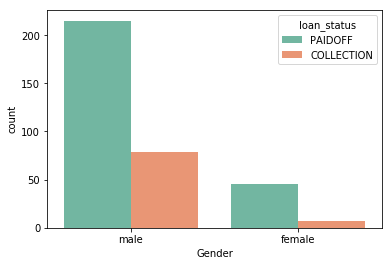

In [7]:
sns.countplot( x="Gender", hue="loan_status",palette="Set2",data=df)

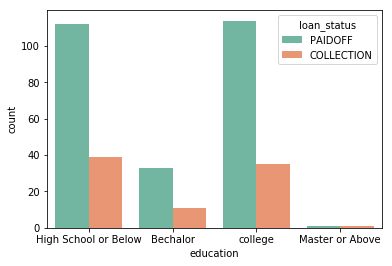

In [8]:
sns.countplot( x="education", hue="loan_status",palette="Set2",data=df)

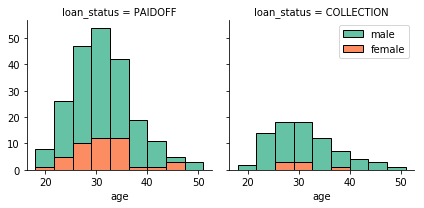

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
f = sns.FacetGrid(df, col="loan_status", hue="Gender", palette="Set2", col_wrap=2)
f.map(plt.hist, 'age', bins=bins, ec="k")
f.axes[-1].legend()
plt.show()

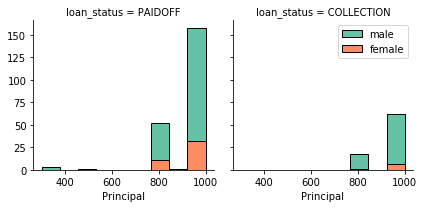

In [10]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
f = sns.FacetGrid(df, col="loan_status", hue="Gender", palette="Set2", col_wrap=2)
f.map(plt.hist, 'Principal', bins=bins, ec="k")
f.axes[-1].legend()
plt.show()


# Data wrangling And Pre-Processing

In [11]:
df.isnull().sum()

Unnamed: 0        0
Unnamed: 0.1      0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

In [12]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


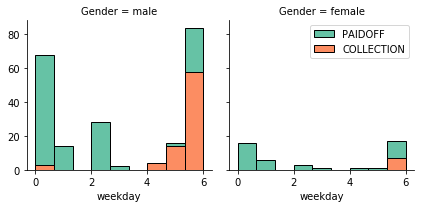

In [13]:
df['weekday'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.weekday.min(), df.weekday.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
g.map(plt.hist, 'weekday', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

From the above graphs, it's evident that applicants who gets loans at the end of the week doesn't pays it off. So, we can use feature binarization to set a threshold values less then day 4.

In [14]:
df['weekend'] = df['weekday'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,weekday,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [15]:
#Extracting feature set 
X=df[['Principal','terms','age','Gender','weekend','education']]
y=df['loan_status'].values
X.head()
#print(y.head())

,Principal,terms,age,Gender,weekend,education
0,1000,30,45,male,0,High School or Below
1,1000,30,33,female,0,Bechalor
2,1000,15,27,male,0,college
3,1000,30,28,female,1,college
4,1000,30,29,male,1,college


In [16]:
X['Gender']=pd.get_dummies(X['Gender'],drop_first=True)
X.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Principal,terms,age,Gender,weekend,education
0,1000,30,45,1,0,High School or Below
1,1000,30,33,0,0,Bechalor
2,1000,15,27,1,0,college
3,1000,30,28,0,1,college
4,1000,30,29,1,1,college


In [17]:
X['education'].value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

In [18]:
edu=pd.get_dummies(X['education'])
X=pd.concat([X,edu],axis=1)
X.head()


,Principal,terms,age,Gender,weekend,education,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,1,0,High School or Below,0,1,0,0
1,1000,30,33,0,0,Bechalor,1,0,0,0
2,1000,15,27,1,0,college,0,0,0,1
3,1000,30,28,0,1,college,0,0,0,1
4,1000,30,29,1,1,college,0,0,0,1


In [19]:
#Drop 'education' and 'master or above' column as we don't need them
X.drop(['education','Master or Above'], axis = 1,inplace=True)
X.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,1,0,0,1,0
1,1000,30,33,0,0,1,0,0
2,1000,15,27,1,0,0,0,1
3,1000,30,28,0,1,0,0,1
4,1000,30,29,1,1,0,0,1


In [20]:
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

So, our final dataset consists of feature set X and predict set y.
##  Now, let's normalize our feature set with zero mean and unit variance.

In [21]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.51578458,  0.92071769,  2.33152555,  0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148, -2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055,  0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188, -2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 ,  0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [22]:
X.shape

(346, 8)

## Spliting the final dataset into train and test sets.

In [23]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [24]:
print("Train shape:: ",X_train.shape,' ',y_train.shape)
print("Test shape:: ",X_test.shape,' ',y_test.shape)

Train shape::  (276, 8)   (276,)
Test shape::  (70, 8)   (70,)


# Classifications Models

## 1. K nearest neighbor (KNN)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [26]:
Ks = 10 #try with 10 different values of k
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.67142857, 0.65714286, 0.71428571, 0.68571429, 0.75714286,
       0.71428571, 0.78571429, 0.75714286, 0.75714286])

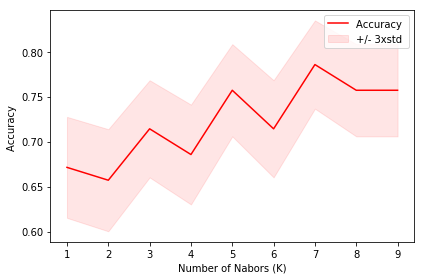

In [27]:
plt.plot(range(1,Ks),mean_acc,'r')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.1,color='red')
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
#plt.show()

In [28]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7857142857142857 with k= 7


In [29]:
# train model with k=7
neigh = KNeighborsClassifier(n_neighbors = 7).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

## 2. Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loanTree.fit(X_train,y_train)
loanTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## 3. Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

## 4. Support Vector Machine


In [33]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

# Evaluation of models

In [34]:
#importing libraries
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

Now, lets download the test dataset!

In [35]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-05-20 05:28:13--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-05-20 05:28:13 (327 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [36]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [37]:
# Pre-processing loan_test
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['weekday'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['weekday'].apply(lambda x: 1 if (x>3)  else 0)
test_X=test_df[['Principal','terms','age','Gender','weekend','education']]
test_X['Gender']=pd.get_dummies(test_X['Gender'],drop_first=True)
test_edu=pd.get_dummies(test_X['education'])
test_X=pd.concat([test_X,test_edu],axis=1)
test_X.drop(['education','Master or Above'], axis = 1,inplace=True)
test_X = preprocessing.StandardScaler().fit(test_X).transform(test_X)
test_X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:11: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


array([[ 0.49362588,  0.92844966,  3.05981865, -1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288,  0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596, -1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057,  0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942,  0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677]])

In [38]:
test_y=test_df['loan_status'].values
test_y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [39]:
test_X.shape

(54, 8)

In [40]:
test_y.shape

(54,)

## 1. KNN

In [41]:
# predicted y
yhat_knn = neigh.predict(test_X)

# jaccard
jaccard_knn = jaccard_similarity_score(test_y, yhat_knn)
print("KNN Jaccard index: ", jaccard_knn)

# f1_score
f1_score_knn = f1_score(test_y, yhat_knn, average='weighted')
print("KNN F1-score: ", f1_score_knn)

KNN Jaccard index:  0.6666666666666666
KNN F1-score:  0.6328400281888654


## 2. Decision Tree

In [42]:
# predicted y
yhat_dt = loanTree.predict(test_X)

# jaccard
jaccard_dt = jaccard_similarity_score(test_y, yhat_dt)
print("DT Jaccard index: ", jaccard_dt)

# f1_score
f1_score_dt = f1_score(test_y, yhat_dt, average='weighted')
print("DT F1-score: ", f1_score_dt)

DT Jaccard index:  0.7222222222222222
DT F1-score:  0.7366818873668188


## 3. Logistic regression

In [43]:
# predicted y
yhat_lg = LR.predict(test_X)
yhat_lg_prob = LR.predict_proba(test_X)

# jaccard
jaccard_lg = jaccard_similarity_score(test_y, yhat_lg)
print("LR Jaccard index: ", jaccard_lg)

# f1_score
f1_score_lg = f1_score(test_y, yhat_lg, average='weighted')
print("LR F1-score: ", f1_score_lg)

# logloss
logloss_lg = log_loss(test_y, yhat_lg_prob)
print("LR log loss: ", logloss_lg)

LR Jaccard index:  0.7407407407407407
LR F1-score:  0.6604267310789049
LR log loss:  0.5672153379912981


## 4. SVM

In [44]:
# predicted y
yhat_svm = clf.predict(test_X)

# jaccard
jaccard_svm = jaccard_similarity_score(test_y, yhat_svm)
print("SVM Jaccard index: ", jaccard_svm)

# f1_score
f1_score_svm = f1_score(test_y, yhat_svm, average='weighted')
print("SVM F1-score: ", f1_score_svm)

SVM Jaccard index:  0.7962962962962963
SVM F1-score:  0.7583503077293734


# Report

   The accuracy of the built models are as follows:-
   
   1.KNN:- 
       1. Jaccard index:  0.6666666666666666
       2. F1-score:  0.6328400281888654
       
   2.Decision Tree:-
       1. Jaccard index:  0.7222222222222222
       2. F1-score:  0.7366818873668188
       
   3.Logistic regression:-
       1. Jaccard index:  0.7407407407407407
       2. F1-score:  0.6604267310789049
       3. Log loss:  0.5672153379912981
       
   4.SVM:-
       1. Jaccard index:  0.7962962962962963
       2. F1-score:  0.7583503077293734
        
       
       

## Conclusion
So, SVM model has the highest accuracy score and performs best for loan status prediction.<br>

## Author:  Madhurima Maji